In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy


In [5]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(15)

        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

# Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")


# Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
         # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coihaique
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | lasa
Processing Record 4 of Set 1 | rio gallegos
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | tchollire
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | den helder
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | sawakin
Processing Record 14 of Set 1 | itarema
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | los llanos de aridane
Processing Record 17 of Set 1 | waddan
Processing Record 18 of Set 1 | skjervoy
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1

Processing Record 39 of Set 4 | hounde
Processing Record 40 of Set 4 | dalbandin
Processing Record 41 of Set 4 | zhezkazgan
Processing Record 42 of Set 4 | klaksvik
Processing Record 43 of Set 4 | kyabe
Processing Record 44 of Set 4 | pitsunda
Processing Record 45 of Set 4 | marica
Processing Record 46 of Set 4 | vallenar
Processing Record 47 of Set 4 | carutapera
Processing Record 48 of Set 4 | ziarat
Processing Record 49 of Set 4 | touros
Processing Record 50 of Set 4 | garowe
Processing Record 1 of Set 5 | priladozhskiy
Processing Record 2 of Set 5 | bealanana
Processing Record 3 of Set 5 | ust-kan
Processing Record 4 of Set 5 | tabou
Processing Record 5 of Set 5 | muromtsevo
Processing Record 6 of Set 5 | tambacounda
Processing Record 7 of Set 5 | muli
Processing Record 8 of Set 5 | puerto rico
Processing Record 9 of Set 5 | agirish
Processing Record 10 of Set 5 | sovetskiy
Processing Record 11 of Set 5 | oranjemund
Processing Record 12 of Set 5 | san carlos de bariloche
Processing

Processing Record 30 of Set 8 | gari
Processing Record 31 of Set 8 | ruwi
Processing Record 32 of Set 8 | beverley
Processing Record 33 of Set 8 | bargal
City not found. Skipping...
Processing Record 34 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 35 of Set 8 | paveh
Processing Record 36 of Set 8 | bongandanga
Processing Record 37 of Set 8 | belyy yar
Processing Record 38 of Set 8 | antigonish
Processing Record 39 of Set 8 | athens
Processing Record 40 of Set 8 | adrar
Processing Record 41 of Set 8 | dungarpur
Processing Record 42 of Set 8 | chacabuco
Processing Record 43 of Set 8 | eyl
Processing Record 44 of Set 8 | grindavik
Processing Record 45 of Set 8 | killybegs
Processing Record 46 of Set 8 | urengoy
Processing Record 47 of Set 8 | karaul
City not found. Skipping...
Processing Record 48 of Set 8 | ciudad bolivar
Processing Record 49 of Set 8 | danielskuil
Processing Record 50 of Set 8 | ambilobe
Processing Record 1 of Set 9 | izberbash
Processing Record 

Processing Record 14 of Set 12 | saint-georges
Processing Record 15 of Set 12 | sfantu gheorghe
Processing Record 16 of Set 12 | conakry
Processing Record 17 of Set 12 | tchibanga
Processing Record 18 of Set 12 | bethanien
Processing Record 19 of Set 12 | likasi
Processing Record 20 of Set 12 | mehamn
Processing Record 21 of Set 12 | sao gabriel da cachoeira
Processing Record 22 of Set 12 | santa maria
Processing Record 23 of Set 12 | soledade
Processing Record 24 of Set 12 | muriti
Processing Record 25 of Set 12 | togur
Processing Record 26 of Set 12 | san-pedro
Processing Record 27 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 28 of Set 12 | timizart
Processing Record 29 of Set 12 | paamiut
Processing Record 30 of Set 12 | saint-joseph
Processing Record 31 of Set 12 | chingirlau
Processing Record 32 of Set 12 | bol
Processing Record 33 of Set 12 | shahrud
Processing Record 34 of Set 12 | esmeraldas
Processing Record 35 of Set 12 | gangotri
City not found. Ski

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coihaique,-45.5752,-72.0662,36.21,80,100,4.61,CL,2022-07-16 22:07:41
1,Mahebourg,-20.4081,57.7000,66.25,73,58,17.00,MU,2022-07-16 22:07:42
2,Lasa,46.6166,10.7002,62.53,82,0,4.92,IT,2022-07-16 22:07:42
3,Rio Gallegos,-51.6226,-69.2181,33.85,93,40,5.75,AR,2022-07-16 22:07:43
4,Port Alfred,-33.5906,26.8910,67.17,42,1,8.46,ZA,2022-07-16 22:04:27
5,Ushuaia,-54.8000,-68.3000,38.86,65,40,8.05,AR,2022-07-16 22:07:43
6,Tchollire,8.4022,14.1698,72.43,95,100,2.59,CM,2022-07-16 22:07:44
7,Vila Franca Do Campo,37.7167,-25.4333,70.21,89,2,6.69,PT,2022-07-16 22:07:44
8,Den Helder,52.9599,4.7593,58.01,85,100,2.30,NL,2022-07-16 22:07:45
9,Ribeira Grande,38.5167,-28.7000,71.80,86,1,5.86,PT,2022-07-16 22:05:24


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coihaique,CL,2022-07-16 22:07:41,-45.5752,-72.0662,36.21,80,100,4.61
1,Mahebourg,MU,2022-07-16 22:07:42,-20.4081,57.7000,66.25,73,58,17.00
2,Lasa,IT,2022-07-16 22:07:42,46.6166,10.7002,62.53,82,0,4.92
3,Rio Gallegos,AR,2022-07-16 22:07:43,-51.6226,-69.2181,33.85,93,40,5.75
4,Port Alfred,ZA,2022-07-16 22:04:27,-33.5906,26.8910,67.17,42,1,8.46
5,Ushuaia,AR,2022-07-16 22:07:43,-54.8000,-68.3000,38.86,65,40,8.05
6,Tchollire,CM,2022-07-16 22:07:44,8.4022,14.1698,72.43,95,100,2.59
7,Vila Franca Do Campo,PT,2022-07-16 22:07:44,37.7167,-25.4333,70.21,89,2,6.69
8,Den Helder,NL,2022-07-16 22:07:45,52.9599,4.7593,58.01,85,100,2.30
9,Ribeira Grande,PT,2022-07-16 22:05:24,38.5167,-28.7000,71.80,86,1,5.86


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

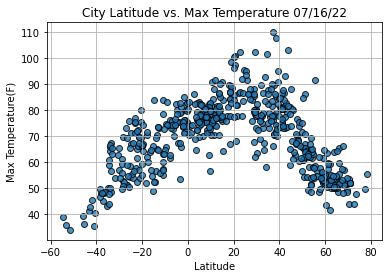

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

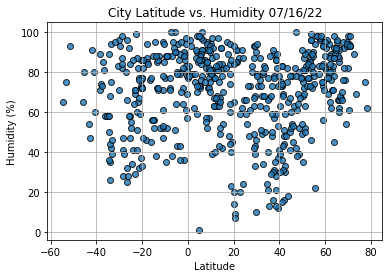

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

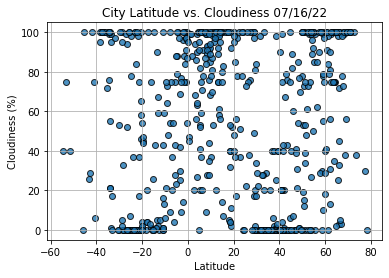

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

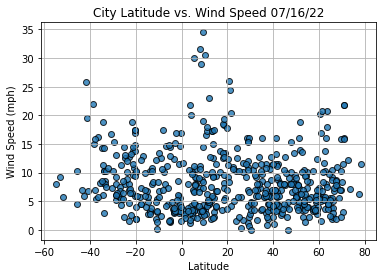

In [20]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()